<a href="https://colab.research.google.com/github/DmitryiLaptev/NumericalMethods_HW/blob/main/6_%D0%9E%D0%94%D0%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
def system_of_odes(t, variables):
  x1, x2 = variables
  dx1dt = 5 * x1 - 0.01 * x1 * x2
  dx2dt = -3 * x2 + 0.0001 * x1 * x2
  return [dx1dt, dx2dt]
initial_conditions = [25000, 500]
time_points = np.linspace(0, 10, 50)
solution = solve_ivp(system_of_odes,
                     [time_points[0], time_points[-1]],
                     initial_conditions,
                     t_eval=time_points)
x1_solution = solution.y[0]
x2_solution = solution.y[1]

for t, x1, x2 in zip (solution.t, x1_solution, x2_solution):
  print (f"t = {t:.2f}, x1 = {x1:.2f}, x2 = {x2:.2f}")

t = 0.00, x1 = 25000.00, x2 = 500.00
t = 0.20, x1 = 26214.68, x2 = 455.25
t = 0.41, x1 = 29508.06, x2 = 434.54
t = 0.61, x1 = 33506.93, x2 = 448.09
t = 0.82, x1 = 35616.48, x2 = 495.08
t = 1.02, x1 = 33935.58, x2 = 549.95
t = 1.22, x1 = 29740.48, x2 = 571.70
t = 1.43, x1 = 26148.96, x2 = 546.79
t = 1.63, x1 = 25035.33, x2 = 496.58
t = 1.84, x1 = 26427.99, x2 = 453.22
t = 2.04, x1 = 29794.33, x2 = 434.98
t = 2.24, x1 = 33661.37, x2 = 450.93
t = 2.45, x1 = 35527.64, x2 = 499.03
t = 2.65, x1 = 33714.69, x2 = 551.20
t = 2.86, x1 = 29654.45, x2 = 570.14
t = 3.06, x1 = 26157.59, x2 = 545.15
t = 3.27, x1 = 25001.81, x2 = 495.89
t = 3.47, x1 = 26456.41, x2 = 452.45
t = 3.67, x1 = 29852.14, x2 = 434.41
t = 3.88, x1 = 33726.83, x2 = 451.55
t = 4.08, x1 = 35601.65, x2 = 499.53
t = 4.29, x1 = 33735.95, x2 = 552.33
t = 4.49, x1 = 29514.58, x2 = 571.67
t = 4.69, x1 = 25862.06, x2 = 544.76
t = 4.90, x1 = 24832.93, x2 = 493.17
t = 5.10, x1 = 26539.89, x2 = 448.92
t = 5.31, x1 = 30104.52, x2 = 432.73
t

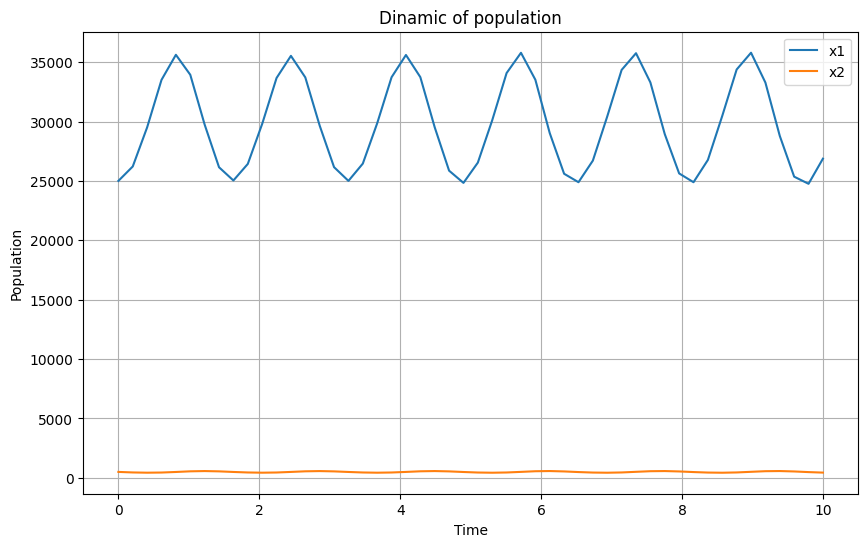

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(time_points, x1_solution, label= 'x1')
plt.plot(time_points, x2_solution, label= 'x2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Dinamic of population')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def euler_method(f, t0, x0, h, num_steps):
  t = np.zeros(num_steps+1)
  x = np.zeros(( len (x0), num_steps+1))
  t[0] = t0
  x[:, 0] = x0
  for i in range (num_steps):
    t[i+1] = t[i] + h
    x[:, i+1] = x[:, i] + h * f(t[i], x[:, i])
  return t, x

In [ ]:
def runge_kutta_method(f, t0, x0, h, num_steps):
  t = np.zeros(num_steps+1)
  x = np.zeros(( len (x0), num_steps+1))
  t[0] = t0
  x[:, 0] = x0
  for i in range (num_steps):
    t[i+1] = t[i] + h
    k1 = h * f(t[i], x[:, i])
    k2 = h * f(t[i] + h/2, x[:, i] + k1/2)
    k3 = h * f(t[i] + h/2, x[:, i] + k2/2)
    k4 = h * f(t[i] + h, x[:, i] + k3)
    x[:, i+1] = x[:, i] + (k1 + 2*k2 + 2*k3 + k4) / 6
  return t, x